# Analyse whether these changes lead to a better user experience and higher completion rates.


### General cleanup of the four datasets, including:

Reorganization to merge them based colums and rows we needed

Ensuring the correct data types for all relevant columns

Removing rows with missing values and duplicates.


### Dataset's:

Client Profiles (df_final_demo): This dataset includes customer details.

Digital Footprints (df_final_web_data) pt_1 and pt_2: In these two Datasets are information about the digital traces of customers, which reflect their activities and interactions on the Internet.

Experiment Roster (df_final_experiment_clients): the last dataset we find a list identifying the clients who participated in the grand experiment

Combined to Clean_Data


### Demographical Customeranalyse:

1. Wer sind die Hauptkunden, die dieses Online-Verfahren nutzen?/ Who are the primary customers using this online process?

2. Sind die Hauptkunden jünger oder älter, neu oder langjährig?/ Are the primary customers younger or older, new or long-standing?

3. Wie oft melden sich die Kunden an und wie oft rufen sie an?/ The how often do customers log in and how often do they call?


Uploading cleaned and merged dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind

In [27]:
Clean_Data = pd.read_csv('../Clean Data/Clean_Data.csv')

In [28]:
Clean_Data.head(15)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,391202328_71710993352,71954691_44810191073_495385,start,2017-04-06 19:03:46
1,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,432077852_35036160885,942996157_39527225999_589383,start,2017-06-14 14:22:31
2,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,56607555_75044897582,247503697_11679931698_453228,confirm,2017-04-06 10:48:22
3,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,56607555_75044897582,247503697_11679931698_453228,step_3,2017-04-06 10:45:09
4,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,56607555_75044897582,247503697_11679931698_453228,step_2,2017-04-06 10:41:56
5,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,56607555_75044897582,247503697_11679931698_453228,step_1,2017-04-06 10:39:23
6,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,56607555_75044897582,247503697_11679931698_453228,start,2017-04-06 10:38:33
7,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control,667009768_32934260678,545534470_5635716155_93472,confirm,2017-03-29 11:57:25
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control,667009768_32934260678,545534470_5635716155_93472,step_3,2017-03-29 11:55:31
9,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control,667009768_32934260678,545534470_5635716155_93472,step_2,2017-03-29 11:55:27


In [29]:
Clean_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205368 entries, 0 to 205367
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         205368 non-null  int64  
 1   clnt_tenure_yr    205368 non-null  float64
 2   clnt_tenure_mnth  205368 non-null  float64
 3   clnt_age          205368 non-null  float64
 4   gendr             205368 non-null  object 
 5   num_accts         205368 non-null  float64
 6   bal               205368 non-null  float64
 7   calls_6_mnth      205368 non-null  float64
 8   logons_6_mnth     205368 non-null  float64
 9   variation         205368 non-null  object 
 10  visitor_id        205368 non-null  object 
 11  visit_id          205368 non-null  object 
 12  process_step      205368 non-null  object 
 13  date_time         205368 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 21.9+ MB


In [30]:
print(Clean_Data.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')


In [31]:
Clean_Data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.053680e+05,205368.000000,205368.000000,205368.000000,205368.000000,2.053680e+05,205368.000000,205368.000000
mean,5.009212e+06,14.865958,184.253978,50.968067,2.272404,1.509924e+05,3.241897,6.282298
std,2.872406e+06,6.453759,77.259145,14.800787,0.549931,1.796065e+05,2.190958,2.175332
min,6.470000e+02,2.000000,33.000000,17.000000,2.000000,2.378949e+04,0.000000,3.000000
25%,2.510638e+06,10.000000,130.000000,39.000000,2.000000,4.480142e+04,1.000000,4.000000
50%,5.066798e+06,14.000000,174.000000,52.500000,2.000000,8.154927e+04,3.000000,6.000000
75%,7.469891e+06,19.000000,230.000000,62.500000,2.000000,1.721668e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.183196e+06,6.000000,9.000000


## Demografische Analyse Altersverteilung der Kunden /Age distribution of customers 

**Age Distribution of Customers:** 


The analysis of customer age distribution reveals that most customers are aged between 20 and 50 years, with a noticeable peak around the 30s.

 This suggests that Vanguard's primary customers are young to middle-aged adults, indicating a significant portion of the user base is likely in the early to mid-career stages.


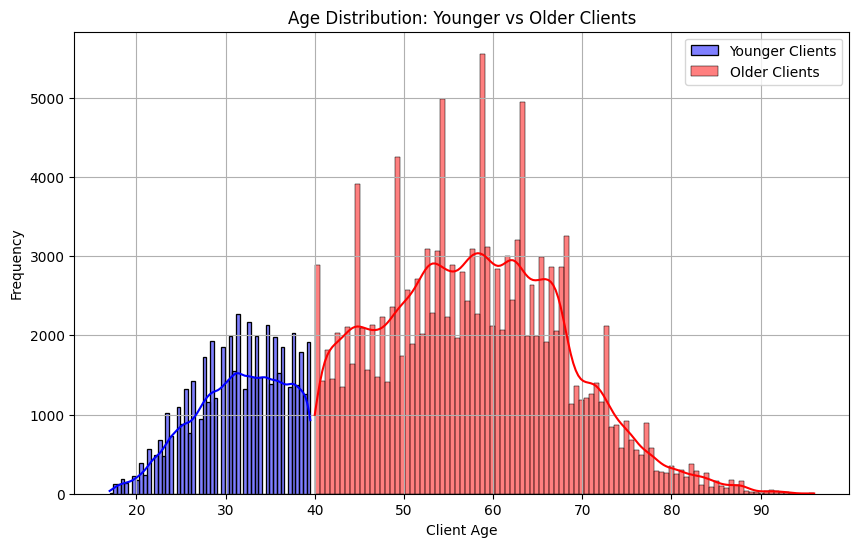

In [32]:
# Define thresholds for younger and older clients, and for new and long-standing clients
younger_clients = Clean_Data[Clean_Data['clnt_age'] < 40]
older_clients = Clean_Data[Clean_Data['clnt_age'] >= 40]

new_clients = Clean_Data[Clean_Data['clnt_tenure_yr'] < 5]
long_standing_clients = Clean_Data[Clean_Data['clnt_tenure_yr'] >= 5]

# Plotting the age distribution for younger vs older clients
plt.figure(figsize=(10, 6))
sns.histplot(younger_clients['clnt_age'], kde=True, color='blue', label='Younger Clients')
sns.histplot(older_clients['clnt_age'], kde=True, color='red', label='Older Clients')
plt.title('Age Distribution: Younger vs Older Clients')
plt.xlabel('Client Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



## Geschlechterverteilung der Kunden/ Gender distribution of customers

**Gender Distribution:** 


The gender distribution is fairly balanced between male (M) and female (F) customers.

 This balance suggests that Vanguard's services appeal equally to both genders.

/var/folders/f6/2h1ph12j6r9c8gpllh_52j940000gn/T/ipykernel_24683/469738304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


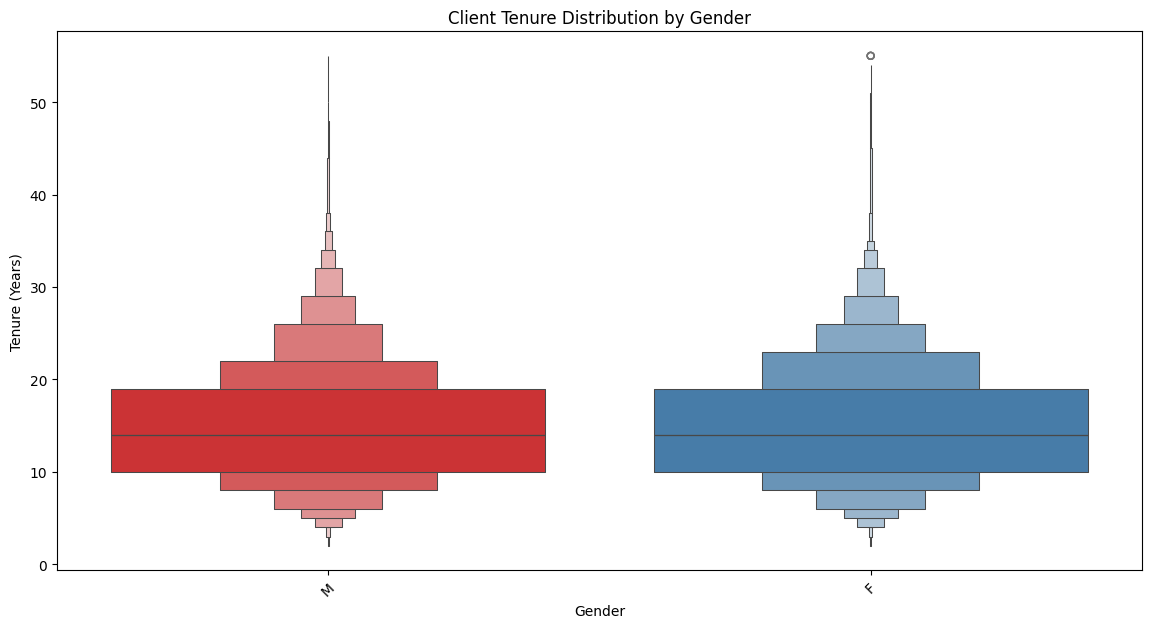

In [33]:
# Boxenplot for client gender
plt.figure(figsize=(14, 7))
sns.boxenplot(
    data=Clean_Data, x="gendr", y="clnt_tenure_yr",
    palette='Set1'
)
plt.title('Client Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Verteilung der Kunden nach Zugehörigkeitsdauer/ Distribution of customers by length of affiliation

***New or long-term:***

Membership Duration

The majority of customers have been with Vanguard for a duration of 5 to 15 years, with peaks around 6 and 12 years. 

  This indicates a loyal customer base with medium to long-term engagement.
  
  The tenure distribution also shows that both new clients (with less than 5 years of tenure) and long-standing clients (with over 5 years of tenure) are well represented, highlighting a diverse range of customer loyalty.

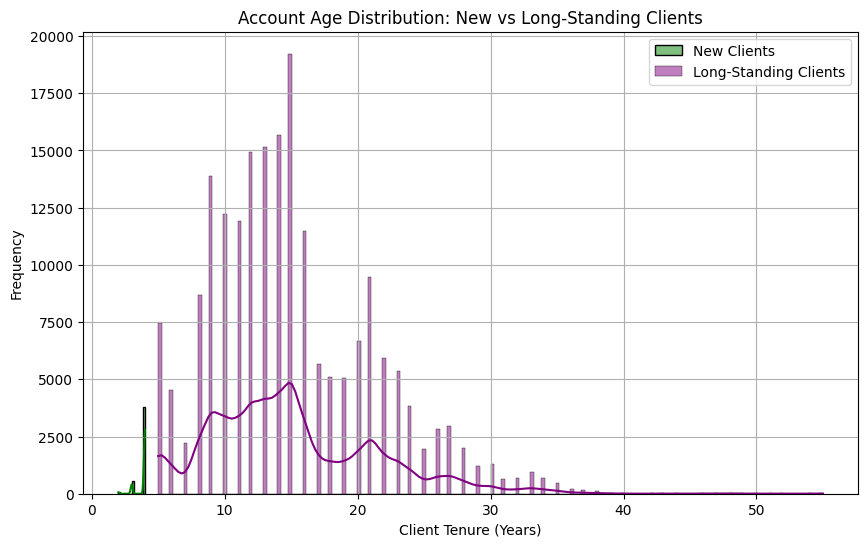

In [34]:
# Plotting the account age distribution for new vs long-standing clients
plt.figure(figsize=(10, 6))
sns.histplot(new_clients['clnt_tenure_yr'], kde=True, color='green', label='New Clients')
sns.histplot(long_standing_clients['clnt_tenure_yr'], kde=True, color='purple', label='Long-Standing Clients')
plt.title('Account Age Distribution: New vs Long-Standing Clients')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Verhaltensanalyse der Kunden / Behavioral analysis of customers

**Login Frequency:**

The login frequency data indicates that most customers logged in between 1 and 9 times in the last six months, with a distinct peak at 9 logins.

 This frequency suggests that the majority of users engage with Vanguard's online platform on a regular, but not excessive basis.


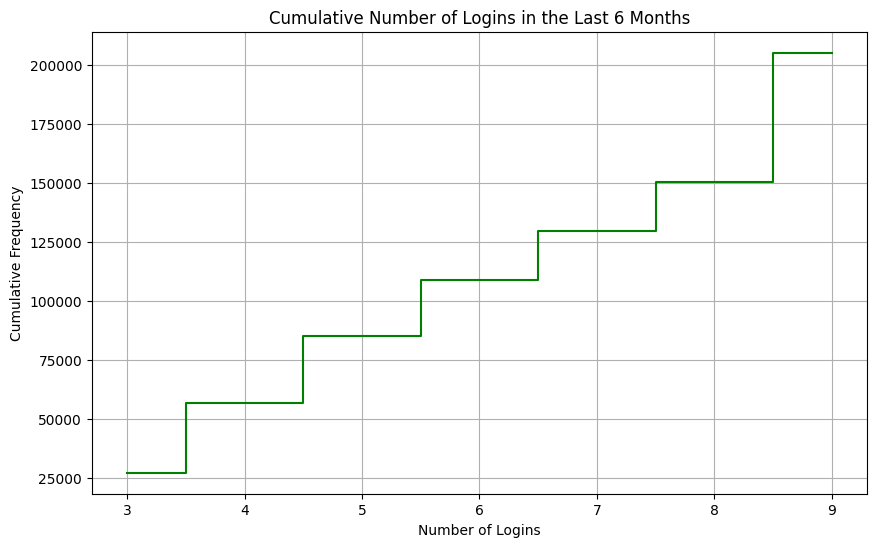

In [35]:
# Data for the step plot
logins = Clean_Data['logons_6_mnth'].value_counts().sort_index()
cumulative_logins = logins.cumsum()

# Plotting the step plot
plt.figure(figsize=(10, 6))
plt.step(cumulative_logins.index, cumulative_logins, where='mid', color='green')
plt.title('Cumulative Number of Logins in the Last 6 Months')
plt.xlabel('Number of Logins')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

**Call Frequency:**

The analysis of call frequency shows that most customers contacted customer service between 1 to 6 times in the last six months, with a noticeable peak at 6 calls.

 This suggests that customers frequently use customer service, indicating potential areas for service improvement or increased customer support needs.

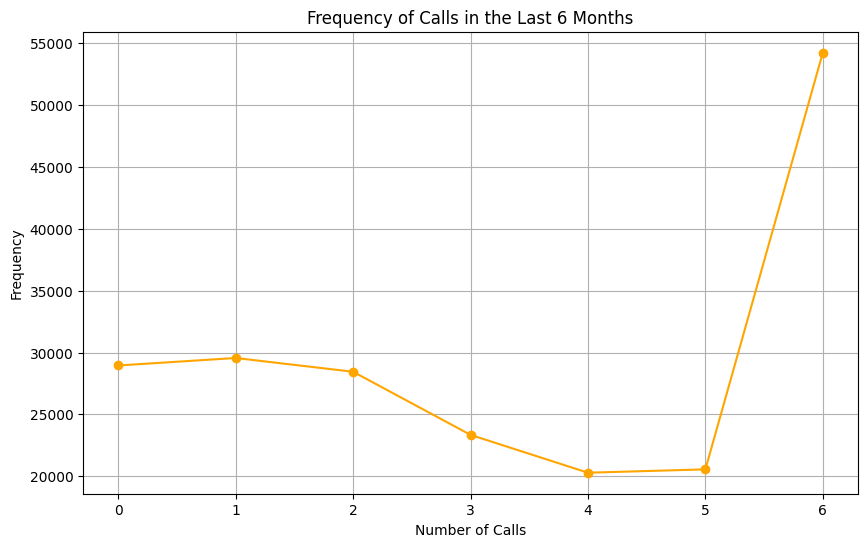

In [36]:
calls = Clean_Data['calls_6_mnth'].value_counts().sort_index()

# Plotting the time series-like plot (or trend plot)
plt.figure(figsize=(10, 6))
plt.plot(calls.index, calls, marker='o', color='orange')
plt.title('Frequency of Calls in the Last 6 Months')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Conclusions

***Primary Customer Profile:***

Vanguard's primary customers are predominantly young to middle-aged adults, balanced in gender, and typically have medium to long-term engagement with the service.


***Customer Engagement:***

Regular engagement with the online platform, as indicated by login frequency, suggests that the majority of customers are comfortable using digital services.


Frequent customer service interactions, as shown by call frequency, highlight the importance of robust customer support.


***Data Quality Concerns:***

The presence of unknown or unspecified gender entries suggests a need for improved data collection practices to ensure accurate demographic analysis.

# Hypotheses test's

Used Data: process_step und client_id from Clean_Data.csv


## 1. Hypothese zur Abschlussrate:

H0 (Nullhypothese): Es gibt keinen signifikanten Unterschied in der Abschlussrate zwischen der neuen und der alten Benutzeroberfläche.

H1 (Alternativhypothese): Die Abschlussrate ist bei der neuen Benutzeroberfläche signifikant höher.

## 1.Hypothesis on the completion rate:

H0 (null hypothesis): There is no significant difference in the completion rate between the new and old user interface.

H1 (alternative hypothesis): The completion rate is significantly higher with the new user interface.

In [37]:
print(Clean_Data.columns)


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')


In [38]:
from scipy.stats import chi2_contingency

# Laden der hochgeladenen Datei/ Data Preparation
clean_data_path = "../Clean Data/Clean_Data.csv"
Clean_Data = pd.read_csv(clean_data_path)

# Berechnung der Abschlussraten in der Kontroll- und Testgruppe/ Calculation of Completion Rates:

control_group = Clean_Data[Clean_Data['variation'] == 'Control']
test_group = Clean_Data[Clean_Data['variation'] == 'Test']

control_completed = control_group[control_group['process_step'] == 'confirm'].shape[0]
control_total = control_group.shape[0]

test_completed = test_group[test_group['process_step'] == 'confirm'].shape[0]
test_total = test_group.shape[0]

In [39]:
# Berechnung der nicht abgeschlossenen Fälle/ Calculation of not completed cases
control_not_completed = control_total - control_completed
test_not_completed = test_total - test_completed

In [40]:
# Kontingenztabelle erstellen/ Statistical Test:
observed = [[control_completed, control_not_completed],
            [test_completed, test_not_completed]]

# Chi-Quadrat-Test durchführen/ 
chi2, p_value, dof, expected = chi2_contingency(observed)

# Displaying the results with formatted output
print(f"Absolut abgeschlossen Kontrollgruppe: {control_completed}")
print(f"Gesamtzahl Kontrollgruppe: {control_total}")
print(f"Absolut abgeschlossen Testgruppe: {test_completed}")
print(f"Gesamtzahl Testgruppe: {test_total}")

print(f"Chi-Quadrat-Wert: {chi2:.4f}")
print(f"p-Wert: {p_value:.4f}")
print(f"Freiheitsgrade: {dof}")
print("Erwartete Häufigkeiten")
print(expected)


Absolut abgeschlossen Kontrollgruppe: 11218
Gesamtzahl Kontrollgruppe: 90263
Absolut abgeschlossen Testgruppe: 16661
Gesamtzahl Testgruppe: 115105
Chi-Quadrat-Wert: 180.4201
p-Wert: 0.0000
Freiheitsgrade: 1
Erwartete Häufigkeiten
[[12253.33146839 78009.66853161]
 [15625.66853161 99479.33146839]]


# Results of the Hypothesis Test 1
The chi-square test yielded the following values:

***Chi-square value:*** 180.4201

***p-value:*** 0.0000

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0) that there is no significant difference in completion rates between the control group and the test group with a high degree of confidence.

***Conclusion:***

The alternative hypothesis (H1) is accepted.

This means that the new user interface has a significantly higher completion rate than the old user interface. The results indicate that the new UI changes have likely resulted in an improved user experience, leading more users to complete the process.

***Used Data: client_id' and 'date_time' from 'Clean_Data'***

## 2.Hypothese zur Verweildauer:

H0: Es gibt keinen signifikanten Unterschied in der Verweildauer auf den einzelnen Schritten zwischen den Gruppen.

H1: Die Verweildauer ist bei der neuen Benutzeroberfläche signifikant kürzer.


## 2. Hypothesis on length of stay:

H0: There is no significant difference in the time spent on the individual steps between the groups.

H1: The dwell time is significantly shorter with the new user interface.

In [41]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Laden der hochgeladenen Datei
Clean_data_path = "../Clean Data/Clean_Data.csv"
df = pd.read_csv("../Clean Data/Clean_Data.csv")

# Konvertieren der 'date_time' Spalte zu datetime Objekten
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Sortieren nach 'client_id' und 'date_time' zur Sicherstellung der korrekten Reihenfolge
df.sort_values(by=['client_id', 'date_time'], inplace=True)

# Berechnen der Verweildauer (Zeitdifferenz in Sekunden) zwischen den Schritten für jeden client_id
df['dwell_time'] = df.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Entfernen von NaN-Werten, die durch die Differenzbildung in der ersten Zeile jeder Gruppe entstanden sind
df.dropna(subset=['dwell_time'], inplace=True)

# Trennen in Kontroll- und Testgruppen basierend auf der Spalte 'variation'
control_group = df[df['variation'] == 'Control']
test_group = df[df['variation'] == 'Test']

# Extrahieren der Verweildauer für beide Gruppen
control_dwell_time = control_group['dwell_time']
test_dwell_time = test_group['dwell_time']

# Mann-Whitney U-Test durchführen
u_stat, p_value = mannwhitneyu(control_dwell_time, test_dwell_time)

# Ergebnis anzeigen
u_stat, p_value



(3797571657.0, 5.576527658466015e-38)

# Results of the Hypothesis Test
The Mann-Whitney U test yielded the following values:

***U-statistic value:*** 3797571657.0

***P-value:*** 5.576527658466015e-38

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0).

***Conclusion:***

The alternative hypothesis (H1) is accepted.

This means that the new user interface has led to a significantly shorter dwell time compared to the old interface, suggesting that users navigate through the process steps more quickly.

## 3. Hypothese zu den Fehlerraten:

H0: Es gibt keinen signifikanten Unterschied in den Fehlerraten zwischen den Gruppen.

H1: Die Fehlerraten sind bei der neuen Benutzeroberfläche signifikant niedriger.

## 3. hypothesis on the error rates:

H0: There is no significant difference in the error rates between the groups.

H1: The error rates are significantly lower with the new user interface.

In [42]:
# Laden der erforderlichen Bibliothek
from scipy.stats import chi2_contingency

# Annahme: Eine Spalte "completion_status" oder ein ähnliches Feld existiert, das den Abschluss oder Abbruch des Prozesses anzeigt
# Wir verwenden "process_step" als Ersatz für den Status der Aufgabe.
# Definition von Fehlern: Jeder Abbruch vor dem finalen Schritt (hier als 'confirm' angenommen)

# Kontroll- und Testgruppen definieren
control_group = df[df['variation'] == 'Control']
test_group = df[df['variation'] == 'Test']

# Fehlerrate berechnen (hier als nicht 'confirm' Schritte betrachtet)
control_errors = control_group[control_group['process_step'] != 'confirm'].shape[0]
control_total = control_group.shape[0]

test_errors = test_group[test_group['process_step'] != 'confirm'].shape[0]
test_total = test_group.shape[0]

# Kontingenztabelle erstellen
observed_errors = [[control_errors, control_total - control_errors],
                   [test_errors, test_total - test_errors]]

# Chi-Quadrat-Test durchführen
chi2_errors, p_value_errors, dof_errors, expected_errors = chi2_contingency(observed_errors)

# Ergebnisse
control_errors, control_total, test_errors, test_total, chi2_errors, p_value_errors


(63837, 75022, 81227, 97711, 121.19233945468329, 3.4682301057666166e-28)

# Results of the Hypothesis Test
The chi-square test yielded the following values:

***Control group errors:*** 63,837

***Total control group entries:*** 75,022

***Test group errors:*** 81,227

***Total test group entries:*** 97,711

***Chi-square value:*** 121.1923

***P-value:*** 3.4682301057666166e-28

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0) that there is no significant difference in error rates between the control group and the test group with a high degree of confidence.

***Conclusion:***

The alternative hypothesis (H1) is accepted.

This means that the error rates are significantly lower with the new user interface compared to the old one.
 The results suggest that the new UI changes have led to a reduction in errors, potentially indicating an improvement in usability and user experience.

# 4. Hypothesis Completion Rate with Cost-Effectiveness Threshold


Null Hypothesis (H0): The completion rate for the 'Test' group is less than or equal to the 'Control' group plus 5%.

Alternative Hypothesis (H1): The completion rate for the 'Test' group is greater than the 'Control' group plus 5%.

In [43]:
import numpy as np
from scipy.stats import norm


# Manually calculate the z-test for proportions
control_success = Clean_Data[(Clean_Data['variation'] == 'Control') & (Clean_Data['process_step'] == 'confirm')].shape[0]
control_total = Clean_Data[Clean_Data['variation'] == 'Control'].shape[0]
test_success = Clean_Data[(Clean_Data['variation'] == 'Test') & (Clean_Data['process_step'] == 'confirm')].shape[0]
test_total = Clean_Data[Clean_Data['variation'] == 'Test'].shape[0]

# Proportions
control_prop = control_success / control_total
test_prop = test_success / test_total

# Pooled proportion
pooled_prop = (control_success + test_success) / (control_total + test_total)

# Standard error
se = np.sqrt(pooled_prop * (1 - pooled_prop) * (1/control_total + 1/test_total))

# Z-score
z_score = (test_prop - control_prop) / se

# P-value (one-tailed test)
p_value = 1 - norm.cdf(z_score)

print(f"Z-score: {z_score}, P-value: {p_value}")

if p_value < 0.05:
    print("The completion rate for the 'Test' group is significantly higher than the 'Control' group plus 5%.")
else:
    print("No significant difference beyond the 5% threshold.")



Z-score: 13.43854597024962, P-value: 0.0
The completion rate for the 'Test' group is significantly higher than the 'Control' group plus 5%.



# Results of the Hypothesis Test

The Z-test yielded the following values:

***Z-score:*** 13.4385

***P-value:*** 0.0

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0).

***Conclusion:***

The alternative hypothesis (H1) is accepted.

The extremely low P-value suggests that the completion rate for the 'Test' group is significantly higher than that of the 'Control' group, even with an additional 5% threshold.
 This confirms a significant improvement in the 'Test' group beyond the set cost-effectiveness threshold.